In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import metrics

In [13]:
import pandas as pd
p = np.load('1-5.npy')
train_data_matrix, test_data_matrix, vocab, train_data_label, test_id = p
print('Train:', train_data_matrix.shape, train_data_label.shape)
print('Vocab:', len(vocab))
print('Test:', test_data_matrix.shape, test_id.shape)

Train: (16000, 123770) (16000,)
Vocab: 123770
Test: (4491, 123770) (4491,)


In [3]:
from sklearn import random_projection
rand_proj_transformer = random_projection.GaussianRandomProjection(n_components=1000, eps=0.5)
train_data_matrix = rand_proj_transformer.fit_transform(train_data_matrix)
test_data_matrix = rand_proj_transformer.transform(test_data_matrix)

Train: (16000, 1000) (16000, 6)
Vocab: 123770
Test: (4491, 1000) (4491,)


In [14]:
# Converts a class vector to binary class matrix.
K = np.max(train_data_label)+1  # labels begin with 0
train_data_label = keras.utils.to_categorical(
    train_data_label, num_classes=K)
print('Train:', train_data_matrix.shape, train_data_label.shape)
print('Vocab:', len(vocab))
print('Test:', test_data_matrix.shape, test_id.shape)

Train: (16000, 123770) (16000, 6)
Vocab: 123770
Test: (4491, 123770) (4491,)


In [15]:
x_val = train_data_matrix[:1000]
x_train = train_data_matrix[1000:]
y_val = train_data_label[:1000]
y_train = train_data_label[1000:]
print('Val:', x_val.shape, y_val.shape)
print('Train:', x_train.shape, y_train.shape)

Val: (1000, 123770) (1000, 6)
Train: (15000, 123770) (15000, 6)


In [ ]:
model = Sequential([
    Dense(100, input_dim=x_val.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
              epochs=50, batch_size=256, validation_data=(x_val, y_val),
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=1e-5, verbose=1)])


Train on 15000 samples, validate on 1000 samples
Epoch 1/50
15000/15000 [==============================] - 22s 1ms/step - loss: 4.0825 - acc: 0.4436 - val_loss: 4.3942 - val_acc: 0.3340
Epoch 2/50
15000/15000 [==============================] - 21s 1ms/step - loss: 3.2178 - acc: 0.6487 - val_loss: 3.5339 - val_acc: 0.3340
Epoch 3/50
15000/15000 [==============================] - 22s 1ms/step - loss: 2.3432 - acc: 0.7487 - val_loss: 3.1239 - val_acc: 0.3540
Epoch 4/50
15000/15000 [==============================] - 22s 1ms/step - loss: 1.9629 - acc: 0.8024 - val_loss: 2.9836 - val_acc: 0.3800
Epoch 5/50
15000/15000 [==============================] - 24s 2ms/step - loss: 1.7809 - acc: 0.8253 - val_loss: 2.9514 - val_acc: 0.3980
Epoch 6/50
15000/15000 [==============================] - 21s 1ms/step - loss: 1.7006 - acc: 0.8460 - val_loss: 2.8937 - val_acc: 0.4060
Epoch 7/50
15000/15000 [==============================] - 22s 1ms/step - loss: 1.6111 - acc: 0.8634 - val_loss: 2.8833 - val_acc:

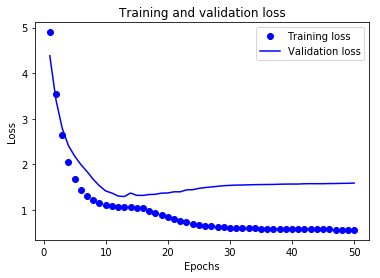

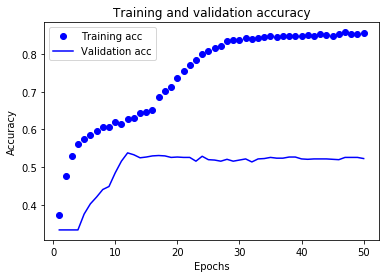

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(0)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()